# Урок 8. Корреляционный анализ

Импорт необходимых библиотек:

In [48]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Задача №1

_Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
**zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].**
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas._

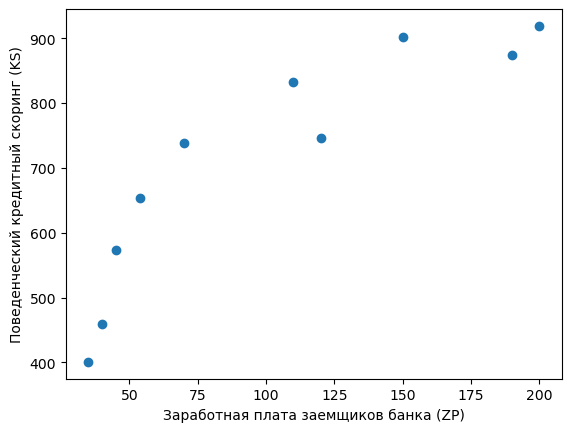

In [49]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков банка (ZP)')
plt.ylabel('Поведенческий кредитный скоринг (KS)', rotation=90)
plt.show()

Наблюдается линейная зависимость. Ожидаем, что между этими данными существует положительная корреляция.

Определим ковариацию двух величин по формуле:
$cov(XY) = M(XY) - M(X)*M(Y)$

In [50]:
cov_zp_ks = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
print(f'cov_xy = {cov_zp_ks:.2f}')

cov_xy = 9157.84


Рассчитаем ковариацию двух величин через функцию cov:

In [51]:
cov_zp_ks = np.cov(zp, ks, ddof=0)[0, 1]
print(f'cov_xy = {cov_zp_ks:.2f}')

cov_xy = 9157.84


Рассчитаем коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков:
$corr(zp, ks) = \frac{Cov(zp, ks)}{\sqrt{Var(zp)}\sqrt{Var(ks)}}$

In [52]:
corr = cov_zp_ks / (np.std(zp) * np.std(ks))
print(f'corr_xy = {corr:.2f}')

corr_xy = 0.89


$r = \frac{\operatorname{cov}(zp, ks)}{\sigma_{zp} \sigma_{ks}}$

In [53]:
corr_coef = cov_zp_ks / (np.std(zp, ddof=0) * np.std(ks, ddof=0))
print(f'r = {corr_coef:.2f}')

r = 0.89


#### Библиотека Numpy

In [61]:
corr_np = np.corrcoef(zp, ks)[0][1]
print(f'r = {corr_np:.2f}')

r = 0.89


#### Библиотека Pandas

In [62]:
corr_pd = pd.Series(zp).corr(pd.Series(ks), method='pearson')
print(f'r = {corr_pd:.2f}')

r = 0.89


## Задача №2

_Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
**131, 125, 115, 122, 131, 115, 107, 99, 125, 111.**
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью **0.95**._

In [56]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha = np.round(1 - 0.95, 2)

Для расчета доверительного интервала при неизвестном СКО, применим $t$-критерий и формулу для среднего арифметического:
    $\overline{X}\underline{+}t\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}}$

In [63]:
n = iq.size
std = iq.std(ddof=1)
mean = iq.mean()
print(f'Размер выборки: n = {n}\n'
      f'Среднее квадратическое отклонение выборки: {std:.2f}\n'
      f'Среднее выборочное: {mean:.2f}')

Размер выборки: n = 10
Среднее квадратическое отклонение выборки: 10.55
Среднее выборочное: 118.10


Рассчитаем значения $t$ и значение отклонения:

In [58]:
t = stats.t.ppf(1 - alpha / 2, n - 1)
d = t * std / n ** 0.5
print(f'd = {d:.2f}\nt = {t:.2f}')

d = 7.54
t = 2.26


Определим доверительный интервал:

In [59]:
min_2 = mean - d
max_2 = mean + d
print(f'Доверительный интервал для математического ожидания с надежностью 0.95 составляет: ({min_2:.2f} ; {max_2:.2f})')

Доверительный интервал для математического ожидания с надежностью 0.95 составляет: (110.56 ; 125.64)


## Задача №3

_Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной **25 кв.см**.
Объем выборки равен **27**, среднее выборочное составляет **174.2**.
Найдите доверительный интервал для математического ожидания с надежностью **0.95**._

In [60]:
min_3 = 174.2 - (1.96 * 25 ** 0.5) / 27 ** 0.5
max_3 = 174.2 + (1.96 * 25 ** 0.5) / 27 ** 0.5
print(f'Доверительный интервал для математического ожидания с надежностью 0.95 составляет: ({min_3:.2f} ; {max_3:.2f})')

Доверительный интервал для математического ожидания с надежностью 0.95 составляет: (172.31 ; 176.09)
